In [1]:
using CovidSim

In [2]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 5, nil, agegrps)
seed_6_12 = seed_case_gen(8, [0,6,6,0,0], 5, nil, agegrps)

(::CovidSim.var"#scase#70"{CovidSim.var"#scase#69#71"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [3]:
alldict, dseries, starting_unexposed = run_a_sim("geo2data.csv",180,11,
       dtfilename="dec_tree_all_25.csv", 
       silent=true,spreadcases=[],
       runcases=[seed_1_6, seed_6_12]);
geo = alldict["geo"];

*** seed day 1 locale 11....
*** seed day 8 locale 11....
Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


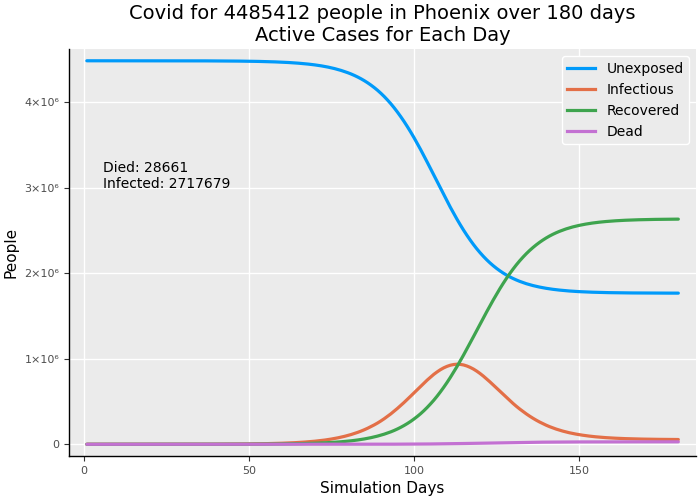

In [4]:
cumplot(dseries,11,geo=geo)

What you see above is a plot of the arrival of the novel Coronavirus in Phoenix, AZ--actually, all of Maricopa county. This simulation starts on February 1, 2020 and runs for 180 days until roughly August 1, 2020. With no social distancing, isolation, or other practices meant to reduce transmission of the virus, 58% of Phoenix contracts Covid-19 and, of those, slightly more than 1% die of the disease. This plot starts with the arrival of 6 people who are asymptomatic on day 1, followed by 12 more one week later. Each of these *seeds* are on the 3rd day of their illness when infectiousness begins to increase significantly.

- The blue line is the number of people who are unexposed to the virus. It goes down over time as more people catch the disease. 

- The orange line is the currently *active* infectious cases. This is *not* what we see in most reports, which show *total cases*--the total of all infections up to a given date. Active cases are the cumulative total of those infected subtracting people who have recovered or who have died. 

- The green line is the number of people who have recovered from the disease. This is important; as more people recover there are fewer people to catch the virus and it eventually "burns itself out."

- The purple line represents the (simulated) people who have died. 

These results are much worse than any we have seen around the world as people have isolated themselves or practiced social distancing, following government guidelines or simply choosing to act prudently.  Let's take a look at how the spread of the disease is modeled in this simulation.

Because the unexposed start out as such a large group, let's just focus on the infectious and dead.

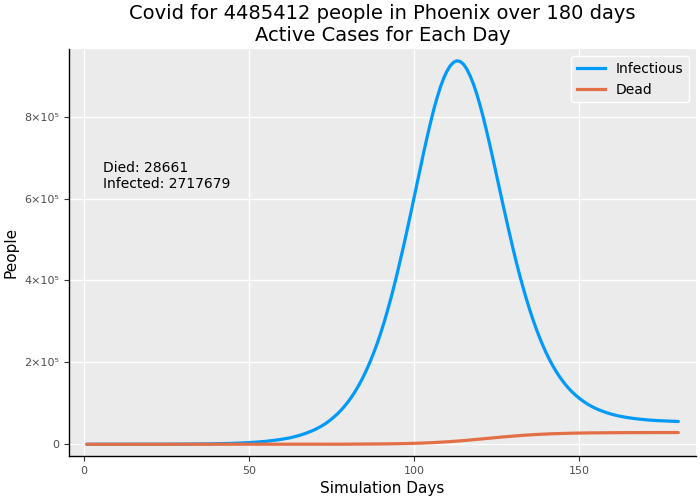

In [5]:
cumplot(dseries,11,geo=geo, [:Infectious, :Dead])

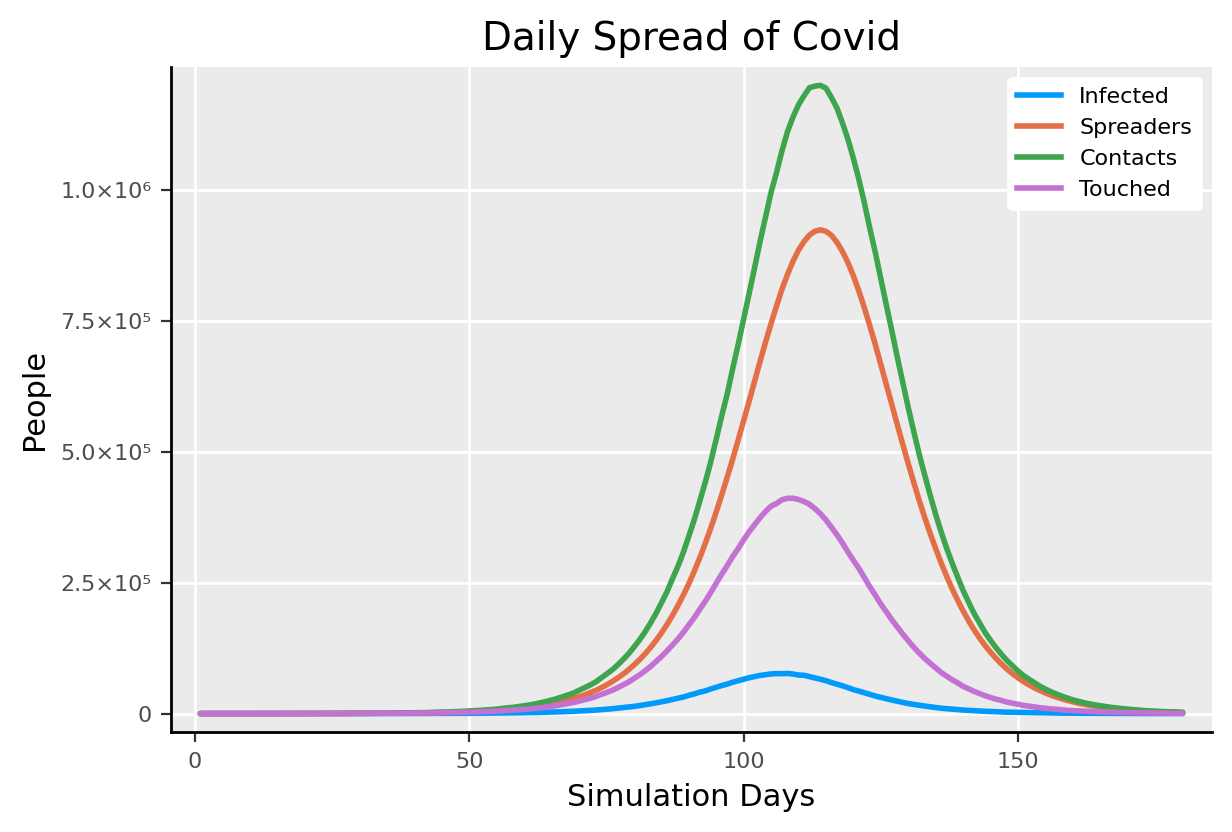

In [6]:
dayplot(spreadq,[:spreaders, :contacts, :touched])

Now this is something you rarely see although most behavioral simulations of epidemics have something like this going on.

- The orange line consists of the "spreaders" who have the disease and who are out and about interacting with other people. 
They interact with people who are unexposed, and thus susceptible, other people who are infected, and people 
who have recovered. We assume, though the evidence is not entirely clear, that people who have recovered will
not get the virus again *during the short time* of the simulation period. 

- The green line represents people the spreaders have been in contact with on each day--it's an average across days
and different people. Some spreaders may be socially active while others are homebodies. On some days, a spreader might 
only see a partner and other days see several people at work. These contacts don't necessary lead to someone else 
getting the disease.

- The purple line are the "consequential" contacts that we call "touches." These represent people who were physically close enough to a spreader or spent enough time with someone that they are potentially vulnerable to catching the virus.

- Finally, the blue line are the people who actually got infected. The model knows it, but they might not know it. Since the model *causes* the transmission of the virus, it is as if *everyone* gets tested perfectly accurately. This definitely does not happen in the real world. The model starts everyone on the first 4 days as asymptomatic, but growing in infectiousness while they are asymptomatic. Getting the disease is modeled as a probability that depends on two factors: how long the spreader has had the disease and the age of the "touched" person.

Why go through all of this in the model? Why not just say such-and-such a probability of the people on the receiving end will get it--call it done. Of course, that is really all multiplying some numbers together comes down to. There are two reasons:
1. We keep track of people by age group, their condition, and the amount of days for which they've had the disease. We want to see the effect especially on people in different age groups.
2. The social behavior of transmitting the virus depends on how the person who has it "reaches out" to make contact with others and the, how shall we say it, the sociability of those who are contacted--are they easily accessible or do they keep away from others. By attempting to represent both sides of contact, we can model social distancing behavior at least a tiny bit more realistically.

That blue line looks like a little hill compared to the charts you may have seen in the news or on the iternet. That's because the number of spreaders and contacts is so high.  In the next plot, we look at just the newly infected.

Note on the immunity of recovery: The partial and temporary immunity
conveyed by having recovered and having developed antibodies to the virus probably protects against re-infection 
from casual encounters. This simulation does not model "viral load"--the  effects of repeated exposure
to lots of virus such as a front-line healthcare worker may experience. No one knows how much protection antibodies 
from recovery provide so our healthcare workers must protect themselves with PPE--personal protective equipment.

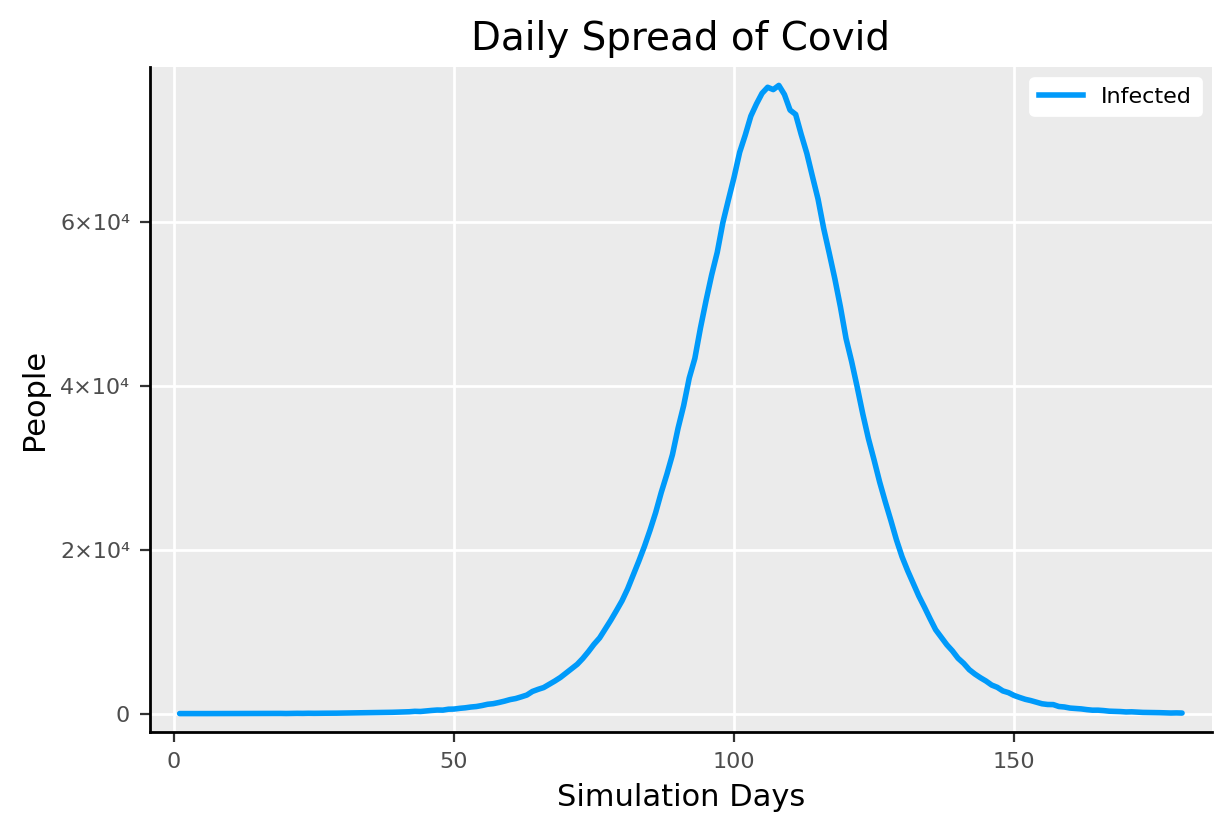

In [7]:
dayplot(spreadq)

Whoa!  That's more like it. Except this is worse than reality. This is the daily new infections. At the peak, 
there are over 60,000 new cases. That doesn't happen with typical degrees of social isolation.  Let's now put some social distancing in place.

(Note: most charts show this as a tall, skinny bars for all of the days. For 180 days that a lot of little bars so the line just connects the tops of what would be bars.)

#### Social Distancing

Our social distancing models the spreaders not contacting as many people and those who would be contacted be much 
reticent in allowing contact. We have a few other factors in the model:
- There is a question of compliance. What percentage of people actually *do* the social distancing? It might seem 
tempting (?) to put the blame on the spreaders, but a lot of them don't yet realize they even have the disease, especially if there is *no testing* for seemingly well people. And people who believe they are unexposed should really hide out. The model makes no distinction between who is unexposed and who is asymptomatic or even symptomatic. We could run such cases, but we start out by assuming that, on average, there is no difference in someone's propensity to comply. Note that the model *does* distinguish between age groups and conditions in degrees of sociability.  We are just talking about compliance vs. non-compliance.
- Next, when does it start?  Does it start all it once or does it gradually get tighter.  
- Next, when does it stop?  Does everyone go out and party the day the city is declared *open* or do people stay home until they begin to feel safer and see disease rates going down?

There are lots of "knobs and dials"--or parameter inputs--to influence the model.  Probably too many--so the start and stop can be multi-step ramps. 

Let's keep it simple because that makes the results clearer. What is the effect of social distancing?  What happens when we stop it?

Here is a case when social distancing starts on day 60 with 75% compliance and is rather strong in terms of contacts and touches.

*** seed day 1 locale 11....
*** seed day 8 locale 11....
Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


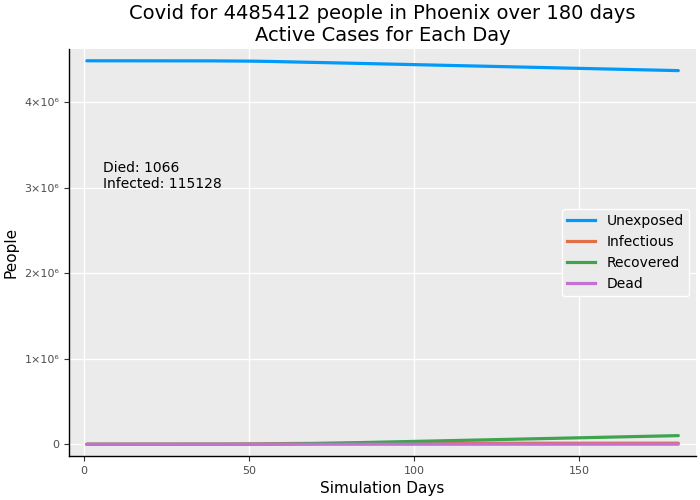

In [8]:
str_60 = sd_gen(start=60, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, dseries, starting_unexposed = run_a_sim("geo2data.csv",180,11,
       dtfilename="dec_tree_all_25.csv", 
       silent=true,spreadcases=[str_60],
       runcases=[seed_1_6, seed_6_12]);
cumplot(dseries, 11, geo=geo)

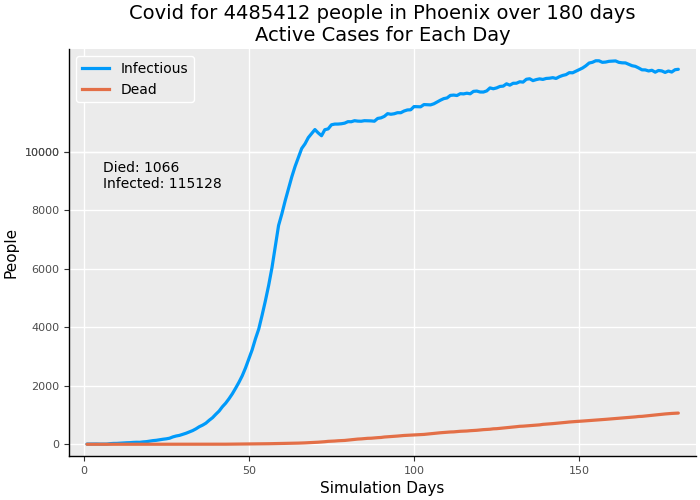

In [9]:
cumplot(dseries, 11, [:Infectious, :Dead],geo=geo)

In [10]:
76670/2605750

0.029423390578528254

That is rather dramatic. That cut the total infections to less that 3% of what it had been; 
and the number of deaths to 2.6% of what they were.

But, what's with the infectious trajectory:  it doesn't seem to go down very quickly.  Having run quite a few of 
these, the effects are sometimes counter-intuitive.  First, the timing of social distancing is *very* important. 
If you start when you are already near the peak, a couple of things happen:
1. You still have a lot of infectious cases because you allowed most of the rise to happen.
2. Infections ramp down slowly because there are fewer people recovering.  Pay attention to the scale. 
Despite the gradual scale, the numbers are much lower.
3. Deaths are proportionally lower but because there is probability in the modeling, the death rate varies a bit more than infections because the absolute numbers are smaller.

It turns out that if we started just a little bit earlier on the curve of rising infections, the effect would be even stronger.  Let's start the same extent of social distancing just 10 days earlier: 

*** seed day 1 locale 11....
*** seed day 8 locale 11....
Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


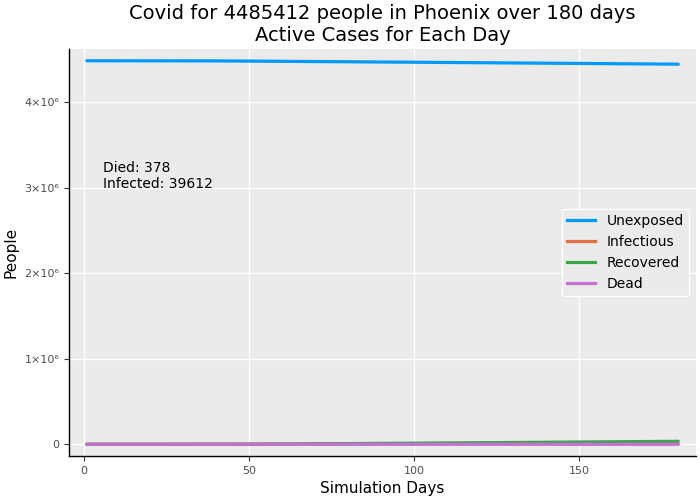

In [11]:
str_50 = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, dseries, starting_unexposed = run_a_sim("geo2data.csv",180,11,
       dtfilename="dec_tree_all_25.csv", 
       silent=true,spreadcases=[str_50],
       runcases=[seed_1_6, seed_6_12]);
cumplot(dseries, 11, geo=geo)

We cut not quite another 30% of infections compared to starting isolation 10 days later.  With exponential growth, 
when you start mitigation practices makes a big difference. 

Looking at this the authorities could say, "We are in great shape; we have this virus licked." 

Let's see what happens if we open up to where we were before after 30 days of social distancing.

*** seed day 1 locale 11....
*** seed day 8 locale 11....
Simulation completed for 180 days.
Updating cumulative statistics for locale 11.


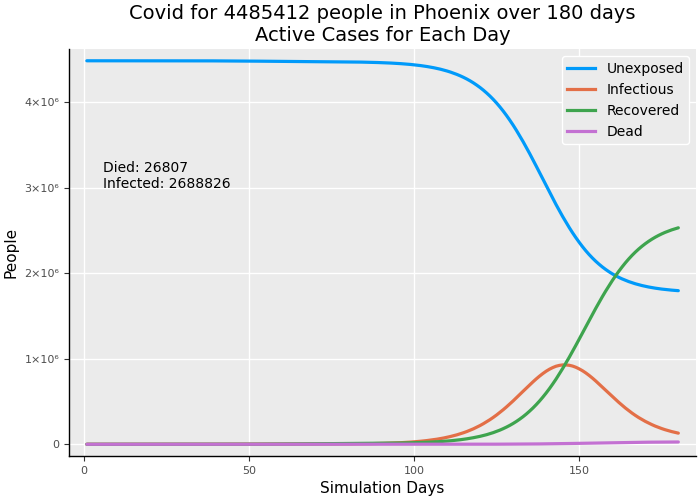

In [12]:
open_80 = sd_gen(start=80, comply=1.0, cf=(.2,1.8), tf=(.18,.62));
open_all = sd_gen(start=80, comply=0.0, cf=(.2,1.8), tf=(.18,.62)); # 0% compliance is a signal to end social distancing
alldict, dseries, starting_unexposed = run_a_sim("geo2data.csv",180,11,
       dtfilename="dec_tree_all_25.csv", 
       silent=true,spreadcases=[str_50,open_all],  # strong social distancing, then open
       runcases=[seed_1_6, seed_6_12]);
cumplot(dseries, 11, geo=geo)

It's kind of like nothing happened because of social distancing. We stopped the rise early; then we started the rise.
We ended up in nearly the same place, except everything started later and the simulation ends before
the infection curve burns itself out.

|              | Infections | Deaths|
|--------------|---------|----------|
|No restrictions | 2,605,750 | 27,199 |
| Restrict. on/off | 2,522,693 | 23,244 |

Because Maricopa County has a large population of over 4 million, 18 people coming in with infections takes a while to get the exponential growth curve "rolling".  What would be more typical is a double bump.  Social distancing starts after significant growth is observed; then it brings the curve down; the people cheer; social distancing ends. 

Let's see what happens in a smaller place like Omaha Nebraska and we won't open up totally, which does get us back 
to what looks like no social distancing at all.

*** seed day 1 locale 14....
*** seed day 8 locale 14....
Simulation completed for 180 days.
Updating cumulative statistics for locale 14.


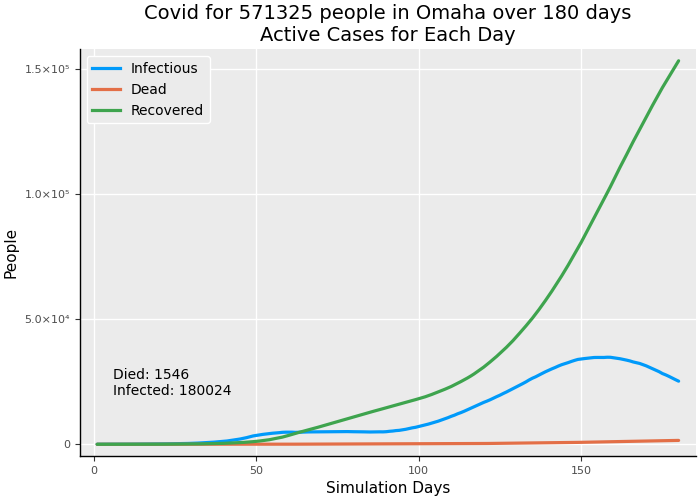

In [13]:
close = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4));
open = sd_gen(start=90, comply=.75, cf=(.2,1.5), tf=(.18,.5
        ));
alldict, dseries, starting_unexposed = run_a_sim("geo2data.csv",180,14,
       dtfilename="dec_tree_all_25.csv", 
       silent=true,spreadcases=[close, open],
       runcases=[seed_1_6, seed_6_12]);
cumplot(dseries, 14,[:Infectious, :Dead, :Recovered], geo=geo)

With Omaha's population of just a little bit over 12% of Phoenix, the 18 "seed" people start the curve growing sooner.
Social distancing flattens it, but with less "herd immunity" from fewer recovered folks the decline is slow
but noticeable.  Then, letting off social distancing even partially and the rise resumes and goes to a higher level. This almost makes it seem like there is no point and "we," whoever "we" are, should just let the disease run its course. But, that would come at a high cost in deaths, especially among those just a bit beyond middle age and up.

The solution to this is challenging:
1. Start social distancing much earlier: when you know a disease is spreading for which no one has immunity. But, if you miss that window...
2. If you face the circumstance of starting later when a significant rise has already occurred, then start and 
persist quite stringent social distancing much longer.  Or devise very detailed groundrules that permit more activity while still reducing transmission.  

The most likely approach is what public health doctors have already proposed.
- expand testing and focus on people who must work and be out and about, not people who are hospitalized and already sick with something--probably Covid
- use tests with result turnaround in hours, not days
- immediately quarantine people who test positive
- trace the contacts of those with positive tests
- test the contacts and quarantine (if positive)
- This places people who can spread the disease under quarantine while allowing more people to participate in managed activities.

The new normal will not be the old normal until a vaccine is not only available, but broadly available to well over a hundred million people in the US.  Only this will create the resistance "hill" of non-susceptible people so that the number of infection cases will decline.

Finally, for comparison here is what Omaha, NE could look like with no social distancing at all.

*** seed day 1 locale 14....
*** seed day 8 locale 14....
Simulation completed for 180 days.
Updating cumulative statistics for locale 14.


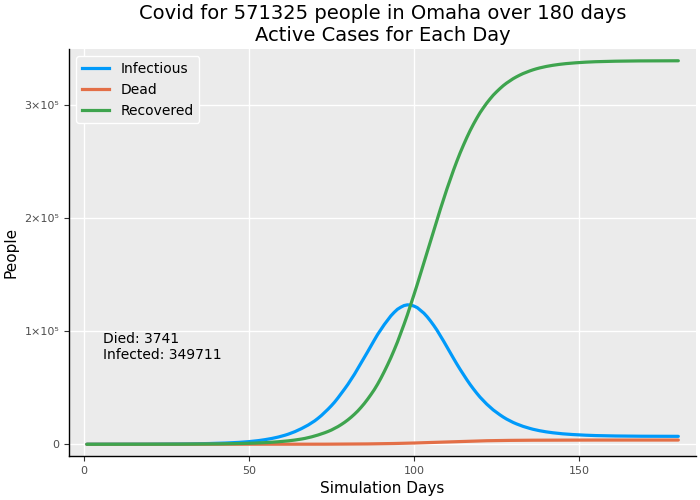

In [14]:
alldict, dseries, starting_unexposed = run_a_sim("geo2data.csv",180,14,
       dtfilename="dec_tree_all_25.csv", 
       silent=true,spreadcases=[],
       runcases=[seed_1_6, seed_6_12]);
cumplot(dseries, 14,[:Infectious, :Dead, :Recovered], geo=geo)